In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/Aniket-bit7/learning-analytics-ml-system/main/data/students_data.csv"

df = pd.read_csv(url)

df.head()

,Student_ID,Quiz1,Quiz2,Quiz3,Time_Spent,Assignments,Attendance,Final_Result
0,S1000,51,56.0,62,6.620920,1,75.776842,Pass
1,S1001,92,16.0,85,12.200994,7,15.356905,Fail
2,S1002,14,85.0,1,3.856499,7,46.290683,Fail
3,S1003,71,89.0,87,8.771189,9,35.473158,Fail
4,S1004,60,43.0,71,11.262998,3,9.471429,Fail


In [3]:
df["Final_Result"].unique()

array(['Pass', 'Fail'], dtype=object)

In [4]:
print("Shape:", df.shape)

Shape: (1000, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student_ID    1000 non-null   object 
 1   Quiz1         1000 non-null   int64  
 2   Quiz2         970 non-null    float64
 3   Quiz3         1000 non-null   int64  
 4   Time_Spent    970 non-null    float64
 5   Assignments   1000 non-null   int64  
 6   Attendance    970 non-null    float64
 7   Final_Result  1000 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [6]:
# dropping Student_ID from modeling as it has no predictive meaning and it may introduce noise
df = df.drop(columns=["Student_ID"])

In [7]:
# checking missing values -->
df.isnull().sum()

,0
Quiz1,0
Quiz2,30
Quiz3,0
Time_Spent,30
Assignments,0
Attendance,30
Final_Result,0


In [8]:
# checking duplicates -->
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Quiz1,Quiz2,Quiz3,Time_Spent,Assignments,Attendance
count,1000.000000,970.000000,1000.000000,970.000000,1000.000000,970.000000
mean,49.937000,49.487629,48.117000,8.698054,5.069000,49.359286
std,29.990072,29.586562,29.686067,9.173544,3.179992,28.834667
min,0.000000,0.000000,0.000000,1.001886,0.000000,0.003103
25%,23.000000,24.000000,21.750000,4.634856,2.000000,24.276081
50%,50.000000,49.000000,46.000000,7.972477,5.000000,48.875067
75%,76.000000,74.000000,74.250000,11.600387,8.000000,73.729368
max,100.000000,100.000000,100.000000,99.000000,10.000000,100.955328


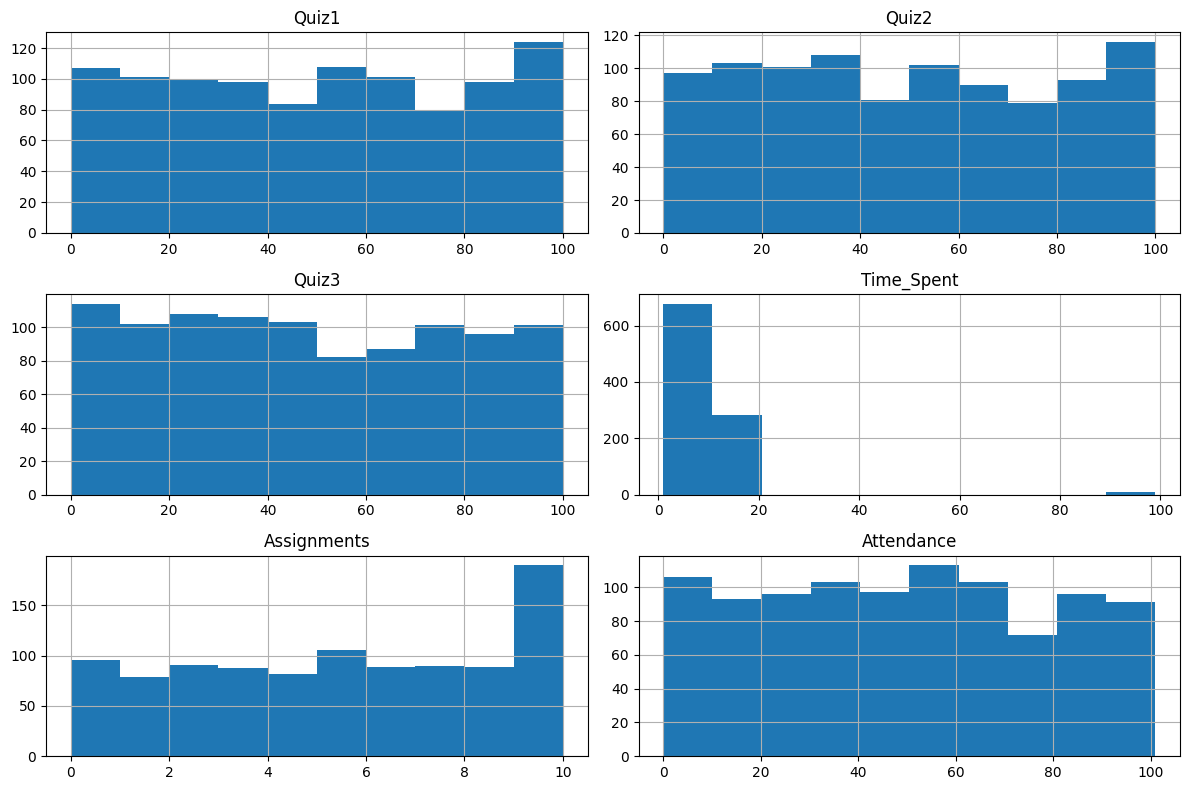

In [10]:
# visualization part -->
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

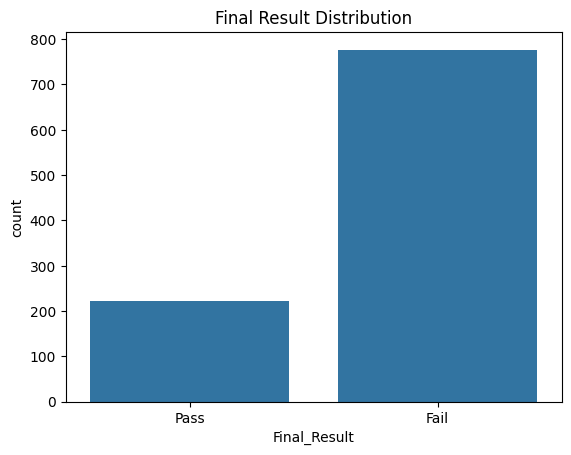

,count
Final_Result,
Fail,777
Pass,223


In [11]:
sns.countplot(x="Final_Result", data=df)
plt.title("Final Result Distribution")
plt.show()

df["Final_Result"].value_counts()

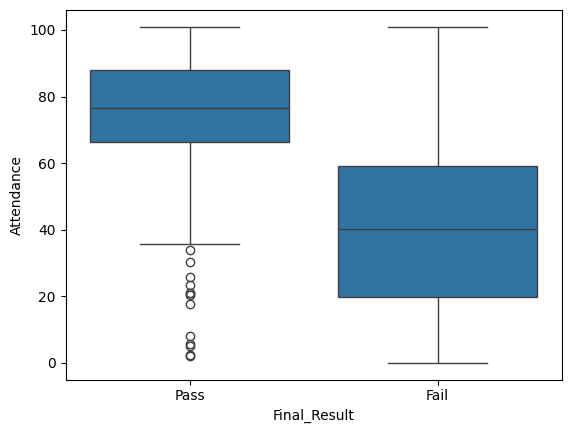

In [12]:
sns.boxplot(x="Final_Result", y="Attendance", data=df)
plt.show()

# Handling Missing Values


In [13]:
# before handling missing values -->
print(df.isnull().sum())

df["Quiz2"].fillna(df["Quiz2"].mean(), inplace=True)
df["Time_Spent"].fillna(df["Time_Spent"].mean(), inplace=True)
df["Attendance"].fillna(df["Attendance"].mean(), inplace=True)

# after handling missing values -->
print(df.isnull().sum())

Quiz1            0
Quiz2           30
Quiz3            0
Time_Spent      30
Assignments      0
Attendance      30
Final_Result     0
dtype: int64
Quiz1           0
Quiz2           0
Quiz3           0
Time_Spent      0
Assignments     0
Attendance      0
Final_Result    0
dtype: int64


/tmp/ipython-input-2956054430.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quiz2"].fillna(df["Quiz2"].mean(), inplace=True)
/tmp/ipython-input-2956054430.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

# Encoding and visualization

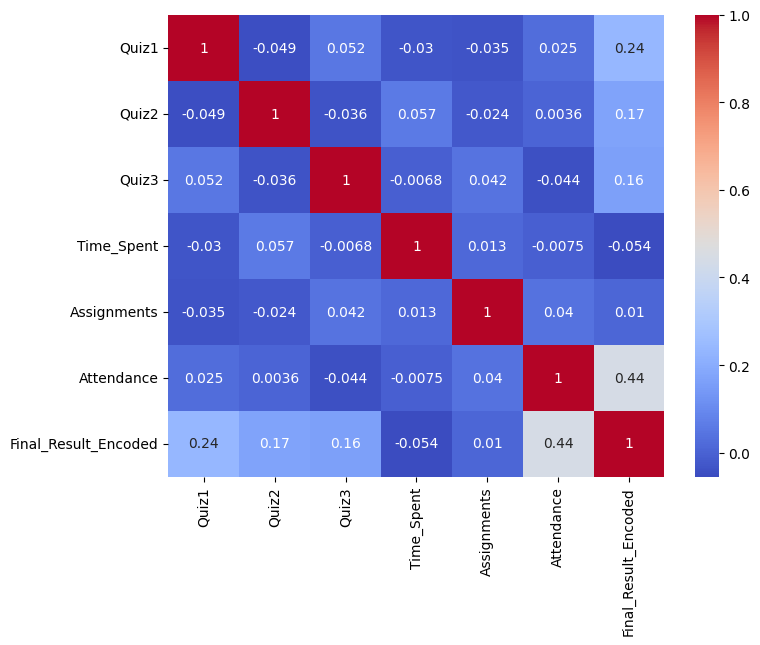

In [14]:
# Encode the 'Final_Result' column to numerical values
df['Final_Result_Encoded'] = df['Final_Result'].map({'Pass': 1, 'Fail': 0})

# correlation heatmap -->
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# Feature Engineering

In [15]:
#Total Quiz Score -->
df["Total_Quiz_Score"] = df["Quiz1"] + df["Quiz2"] + df["Quiz3"]

In [16]:
#Average Quiz Score -->
df["Average_Quiz_Score"] = df["Total_Quiz_Score"] / 3

In [17]:
# Quiz_Consistency -->
df["Quiz_Std"] = df[["Quiz1", "Quiz2", "Quiz3"]].std(axis=1)

In [18]:
# Engagement_Index -->
df["Engagement_Index"] = (
    df["Time_Spent"] * 0.5 +
    df["Assignments"] * 0.3 +
    df["Attendance"] * 0.2
)

In [19]:
df

,Quiz1,Quiz2,Quiz3,Time_Spent,Assignments,Attendance,Final_Result,Final_Result_Encoded,Total_Quiz_Score,Average_Quiz_Score,Quiz_Std,Engagement_Index
0,51,56.000000,62,6.620920,1,75.776842,Pass,1,169.000000,56.333333,5.507571,18.765829
1,92,16.000000,85,12.200994,7,15.356905,Fail,0,193.000000,64.333333,42.003968,11.271878
2,14,85.000000,1,3.856499,7,46.290683,Fail,0,100.000000,33.333333,45.214305,13.286386
3,71,89.000000,87,8.771189,9,35.473158,Fail,0,247.000000,82.333333,9.865766,14.180226
4,60,43.000000,71,11.262998,3,9.471429,Fail,0,174.000000,58.000000,14.106736,8.425785
...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99.000000,4,8.096886,9,68.936588,Pass,1,191.000000,63.666667,51.964732,20.535761
996,100,8.000000,2,6.731769,1,33.493302,Fail,0,110.000000,36.666667,54.930259,10.364545
997,27,37.000000,64,12.352300,0,50.558511,Fail,0,128.000000,42.666667,19.139836,16.287852
998,73,47.000000,3,12.701563,3,65.218229,Fail,0,123.000000,41.000000,35.383612,20.294427


In [20]:
# Performance Ratio -->
df["Quiz_Percentage"] = (df["Total_Quiz_Score"] / 300) * 100

In [21]:
# Effort_Performance_Ratio -->
df["Effort_Performance_Ratio"] = (
    df["Total_Quiz_Score"] / (df["Time_Spent"] + 1)
)